In [2]:
import pandas as pd

df = pd.read_csv("respostas_classificadas.csv")

# Frequência por nível
print(df["nivel_classificacao"].value_counts().sort_index())

# Porcentagem
print(df["nivel_classificacao"].value_counts(normalize=True).sort_index() * 100)

# Média geral do nível
print("Média do nível:", df["nivel_classificacao"].mean())


nivel_classificacao
0     1
1    12
3    16
Name: count, dtype: int64
nivel_classificacao
0     3.448276
1    41.379310
3    55.172414
Name: proportion, dtype: float64
Média do nível: 2.0689655172413794


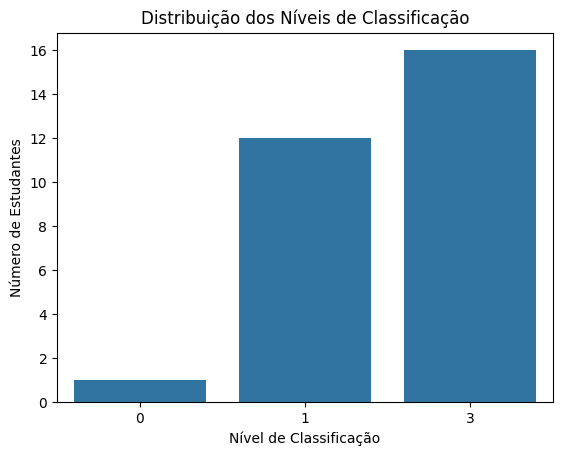

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de barras de frequência por nível
sns.countplot(x="nivel_classificacao", data=df)
plt.title("Distribuição dos Níveis de Classificação")
plt.xlabel("Nível de Classificação")
plt.ylabel("Número de Estudantes")
plt.show()


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Combinar todas as colunas textuais
df["texto_completo"] = df[["interpretacao", "estrategia", "calculos", "resposta_final"]].fillna("").agg(" ".join, axis=1)

# Vetorização
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df["texto_completo"])
y = df["nivel_classificacao"]

# Treinar modelo simples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
modelo = RandomForestClassifier()
modelo.fit(X_train, y_train)

# Avaliação
y_pred = modelo.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      0.33      0.50         3
           3       0.40      1.00      0.57         2

    accuracy                           0.50         6
   macro avg       0.47      0.44      0.36         6
weighted avg       0.63      0.50      0.44         6



/home/laza/chat_RAG_hf/api/venv_api_chat/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/laza/chat_RAG_hf/api/venv_api_chat/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/laza/chat_RAG_hf/api/venv_api_chat/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f